In [7]:
import numpy as np
import matplotlib as mpl
mpl.use('nbAgg')
import matplotlib.pyplot as plt
import lmfit
from matplotlib import rc
rc('text', usetex=True)

#%matplotlib nbagg
%matplotlib notebook

# LSWT fitting

In [8]:

def get_gamma(q, J, Kc):
    H, K = q
    return 0.5 * (np.cos(2*np.pi*H) + np.cos(2*np.pi*K))

def get_inner(J, Kc):
    return ((1 + Kc/(4*J))**2)

def pouter(q, J, Kc):
    return (get_gamma(q, J, Kc) + Kc/(4*J))**2

def mouter(q, J, Kc):
    return (get_gamma(q, J, Kc) - Kc/(4*J))**2


def LSWTdispersion(q, J, Kc):
    S = 1.
    dis = 4.*S*J*np.sqrt(get_inner(J, Kc)-pouter(q,J,Kc))
    return dis
        
def LSWTdispersion_pm(q, J, Kc):
    S = 1.
    pdis = 4.*S*J*np.sqrt(get_inner(J, Kc)-pouter(q,J,Kc))
    mdis = 4.*S*J*np.sqrt(get_inner(J, Kc)-mouter(q,J,Kc))
    return pdis, mdis
            

# Dispersion values

In [23]:
H = np.array((0.46, 0.41, 0.36, 0.31,  0.26, 0.25))
K = np.array(( 0.0,  0.0,  0.0,  0.0,   0.0, 0.25))
Disp = np.array((70.64376253,  75.49856088,  73.52914799,  63.91952754, 66.56535469,  63.00118274))
x = np.stack((H,K))

# Fitting dispersion

In [24]:
Fullmodel = lmfit.Model(LSWTdispersion)
params = Fullmodel.make_params(J = 15, Kc=0.05)
    
params['J'].vary = True
params['Kc'].set(value = 0.05, vary = False)

result = Fullmodel.fit(Disp, q=x, params=params)

# Fit Result

<IPython.core.display.Javascript object>


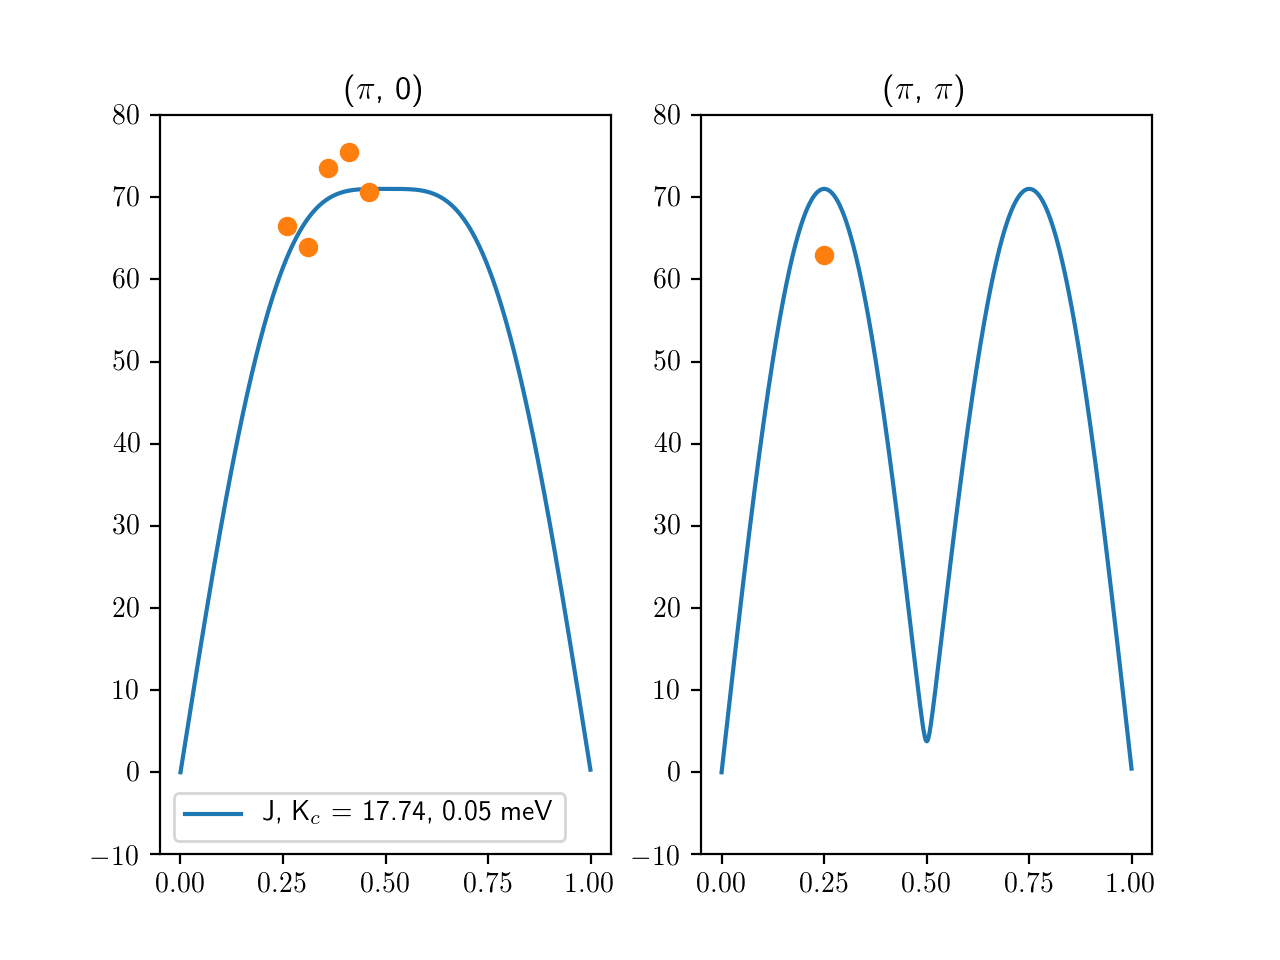

(-10, 80)

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2)

xx = np.arange(0,1,.001)
xy = xx*0
yy = xx
x1 = np.stack((xx,xy))
x2 = np.stack((xx,yy))
fit1 = LSWTdispersion(x1, result.best_values['J'], 0.05)
fit2 = LSWTdispersion(x2, result.best_values['J'], 0.05)
ax1.plot(xx, fit1, label = r'J, K$_c$ = {:.2f}, 0.05 meV'.format(result.best_values['J']))
ax2.plot(xx, fit2)
ax1.plot(H[:5],Disp[:5], 'o')
ax2.plot(H[5],Disp[5], 'o')


ax1.set_title(r'($\pi$, 0)')
ax2.set_title(r'($\pi$, $\pi$)')
ax1.legend(loc = 3)
ax1.set_ylim(-10,80)
ax2.set_ylim(-10,80)